In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
tf.debugging.set_log_device_placement(True)

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# data loading

data_path = os.path.join('data','train.csv')
test_path = os.path.join('data','test.csv')

data_df = pd.read_csv(data_path)
test_df = pd.read_csv(test_path)

In [4]:
#data manipulation

# description says 28x28 img.
PIXELS_NUMBER = 28
l_reshape = lambda x: np.array(x).T.reshape((PIXELS_NUMBER, PIXELS_NUMBER,1),order='C')

y = pd.get_dummies( data_df['label'].values)
X = data_df.drop('label', axis=1)
X ,test_df= X/255.0, test_df/255.0

X_reshaped = np.apply_along_axis(l_reshape,1, X.values)
test_X = np.apply_along_axis(l_reshape,1, test_df.values)

print('shape of X',X_reshaped.shape,' ,shape of test X',test_X.shape)

shape of X (42000, 28, 28, 1)  ,shape of test X (28000, 28, 28, 1)


   0  1  2  3  4  5  6  7  8  9
8  0  0  0  0  0  1  0  0  0  0


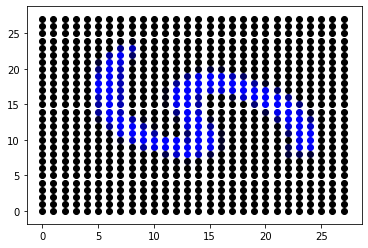

In [5]:

def scatter_result(data,pred,index_n):
    for i,x in enumerate(data[index_n]):
        for j,k in enumerate(x):
            plt.scatter(i,j,color=(0., 0., k[0]/1.))
    print(pred[index_n:index_n+1])
    plt.show()

scatter_result(X_reshaped,y,8)   

In [6]:
#building model

kernel_shape = (3, 3)
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_shape, activation='relu', input_shape=X_reshaped.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, kernel_shape, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, kernel_shape, activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
# model.add(layers.Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics = ['accuracy'])

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/tas

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 512)       590336    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         1179904   
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [ ]:

model.fit(X_reshaped,y,batch_size=64,validation_split=0.1,epochs=10)

Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GatherV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GatherV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /jo

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
591/591 [==============================] - 11s 19ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0376 - val_accuracy: 0.9895
Epoch 5/10
588/591 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9940Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in devi

In [ ]:
import time
model_name ='saved_model/model_1_'+str(time.time())
print(model_name)
model.save(model_name) 

In [ ]:
predictions = model.predict(test_X)

In [ ]:
# predictions
scatter_result(test_X,predictions,0)   

In [ ]:
l_max_index = lambda x: np.where(x==np.max(x))
preds =np.apply_along_axis(l_max_index,1, predictions)

In [ ]:
final_preds = [['ImageId','Label']]
for ind,x in enumerate(preds):
    final_preds.append([ind+1,x[0][0]])

In [ ]:
results = pd.DataFrame(final_preds[1:],columns=final_preds[0])
results = results.set_index('ImageId')

In [ ]:
results.to_csv('results.csv')

In [ ]:
results